In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [114]:
data = pd.read_csv("D:\ML Projects\ENB2012_data.csv")

In [116]:
data.head()

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

In [118]:
data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [120]:
data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [122]:
data.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [124]:
data.shape

(768, 10)

In [126]:
pd.isnull(data).sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

##### Creating a Overall Load Column

##### Overall Load = Heating Load + Cooling Load

In [129]:
data['Overall Load'] = data['Heating Load'] + data['Cooling Load']
data.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  Overall Load  
0         21.33         36.88  
1         21.33         36.88  
2         21.33         36.88  
3         21.33         36.88  
4         28.28         49.12

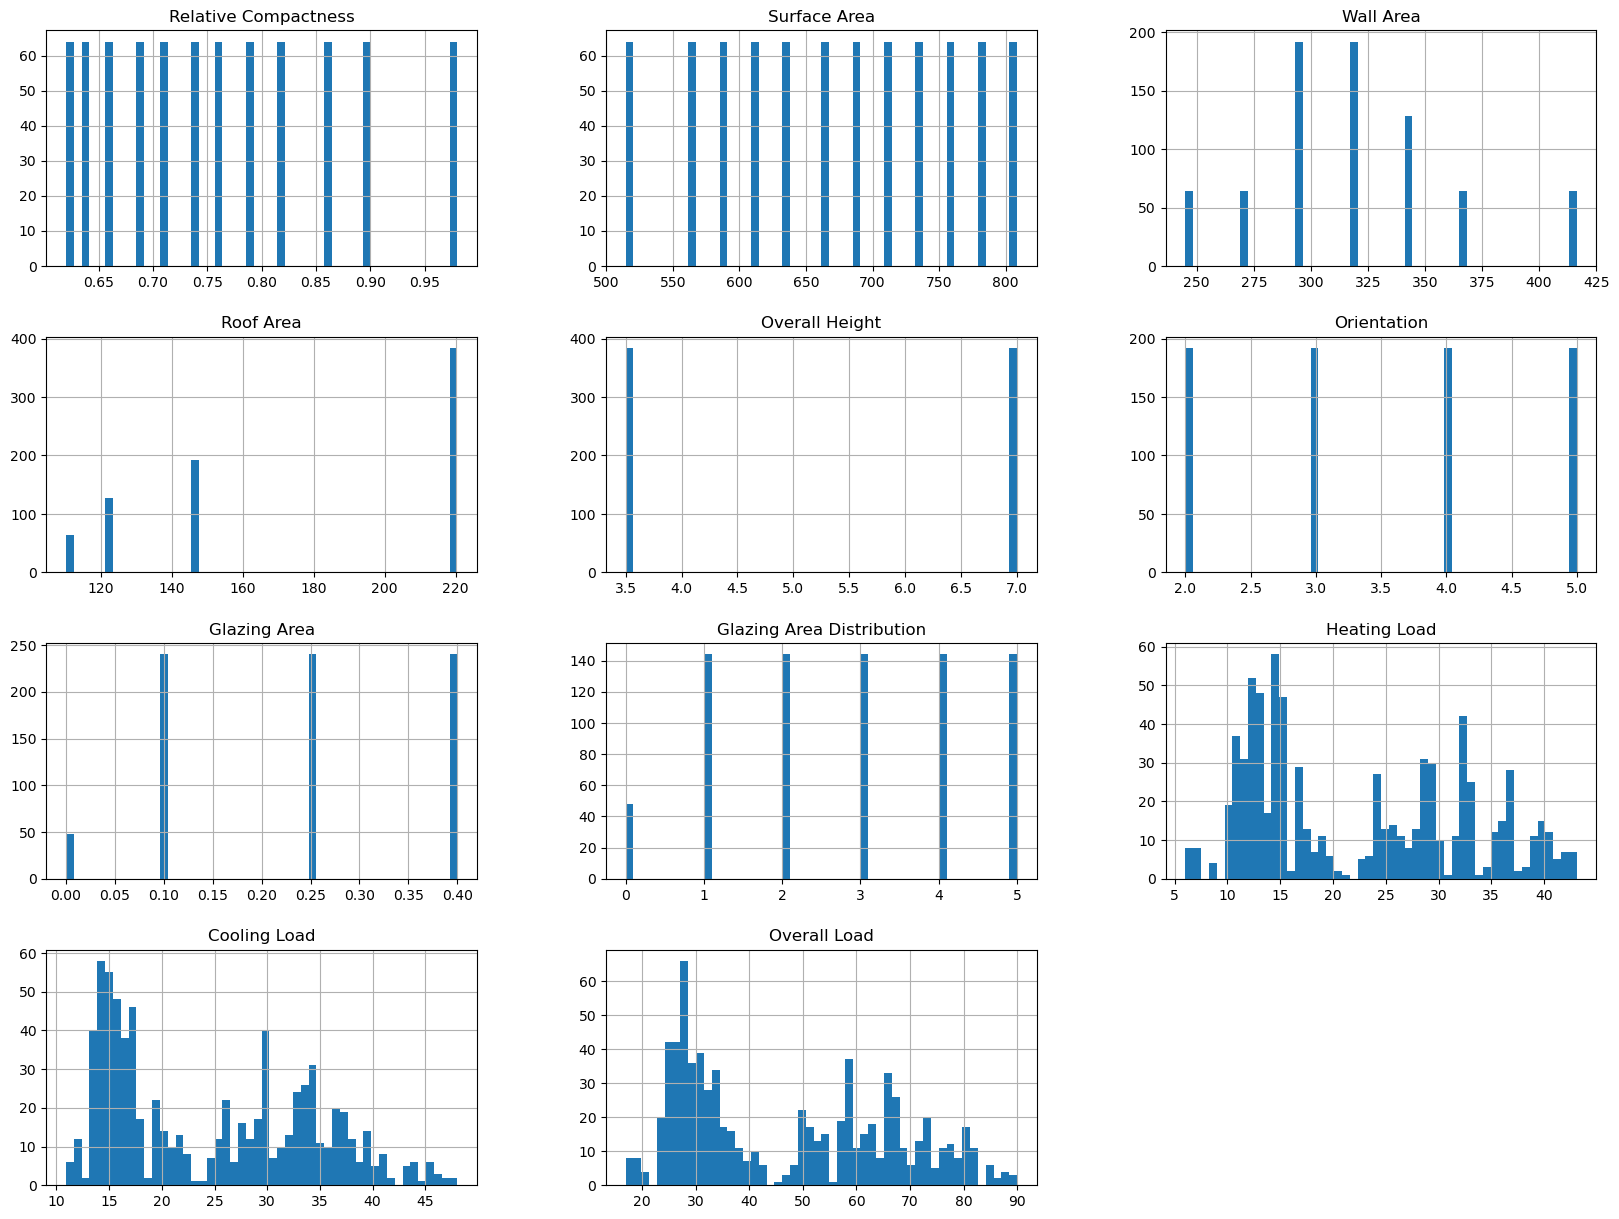

In [135]:
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [137]:
data.corr()

Relative Compactness  Surface Area     Wall Area  \
Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing Area Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                       6.343391e-01 -6.729989e-01  4.271170e-01   
Overall Load                       6.319499e-01 -6.693889e-01  4.445024e-01   

                              Roof Area  Overall Height   Orientation  \
Relative Compactness      -8.688234e-01    8.277473e-01  4.678592e-17   
Surface Area               8.807195e-01   -8.581477e-01 -3.459372e-17   
Wall Area                 -2.923165e-01    2.809757e-01 -2.429499e-17   
Roof Area                  1.000000e+00   -9.725122e-01 -5.830058e-17   
Overall Height            -9.725122e-01    1.000000e+00  4.492205e-17   
Orientation               -5.830058e-17    4.492205e-17  1.000000e+00   
Glazing Area              -1.759011e-15    1.489134e-17 -9.406007e-16   
Glazing Area Distribution -1.078071e-15   -2.920613e-17 -2.549352e-16   
Heating Load              -8.618283e-01    8.894307e-01 -2.586534e-03   
Cooling Load              -8.625466e-01    8.957852e-01  1.428960e-02   
Overall Load              -8.674227e-01    8.979448e-01  5.637309e-03   

                           Glazing Area  Glazing Area Distribution  \
Relative Compactness      -2.960552e-15              -7.107006e-16   
Surface Area               3.636925e-15               2.438409e-15   
Wall Area                 -8.567455e-17               2.067384e-16   
Roof Area                 -1.759011e-15              -1.078071e-15   
Overall Height             1.489134e-17              -2.920613e-17   
Orientation               -9.406007e-16              -2.549352e-16   
Glazing Area               1.000000e+00               2.129642e-01   
Glazing Area Distribution  2.129642e-01               1.000000e+00   
Heating Load               2.698410e-01               8.736759e-02   
Cooling Load               2.075050e-01               5.052512e-02   
Overall Load               2.410480e-01               6.991125e-02   

                           Heating Load  Cooling Load  Overall Load  
Relative Compactness           0.622272      0.634339      0.631950  
Surface Area                  -0.658120     -0.672999     -0.669389  
Wall Area                      0.455671      0.427117      0.444502  
Roof Area                     -0.861828     -0.862547     -0.867423  
Overall Height                 0.889431      0.895785      0.897945  
Orientation                   -0.002587      0.014290      0.005637  
Glazing Area                   0.269841      0.207505      0.241048  
Glazing Area Distribution      0.087368      0.050525      0.069911  
Heating Load                   1.000000      0.975862      0.994299  
Cooling Load                   0.975862      1.000000      0.993585  
Overall Load                   0.994299      0.993585      1.000000

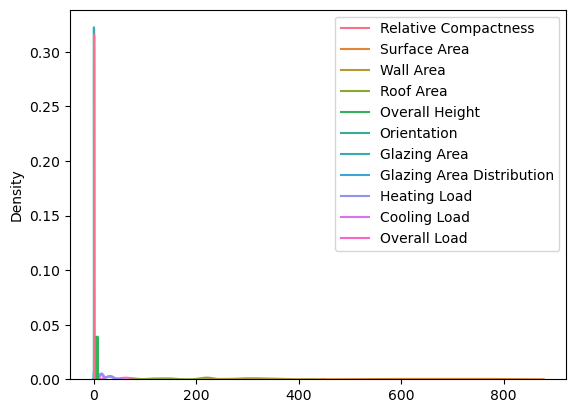

In [151]:
sns.kdeplot(data)
plt.show()

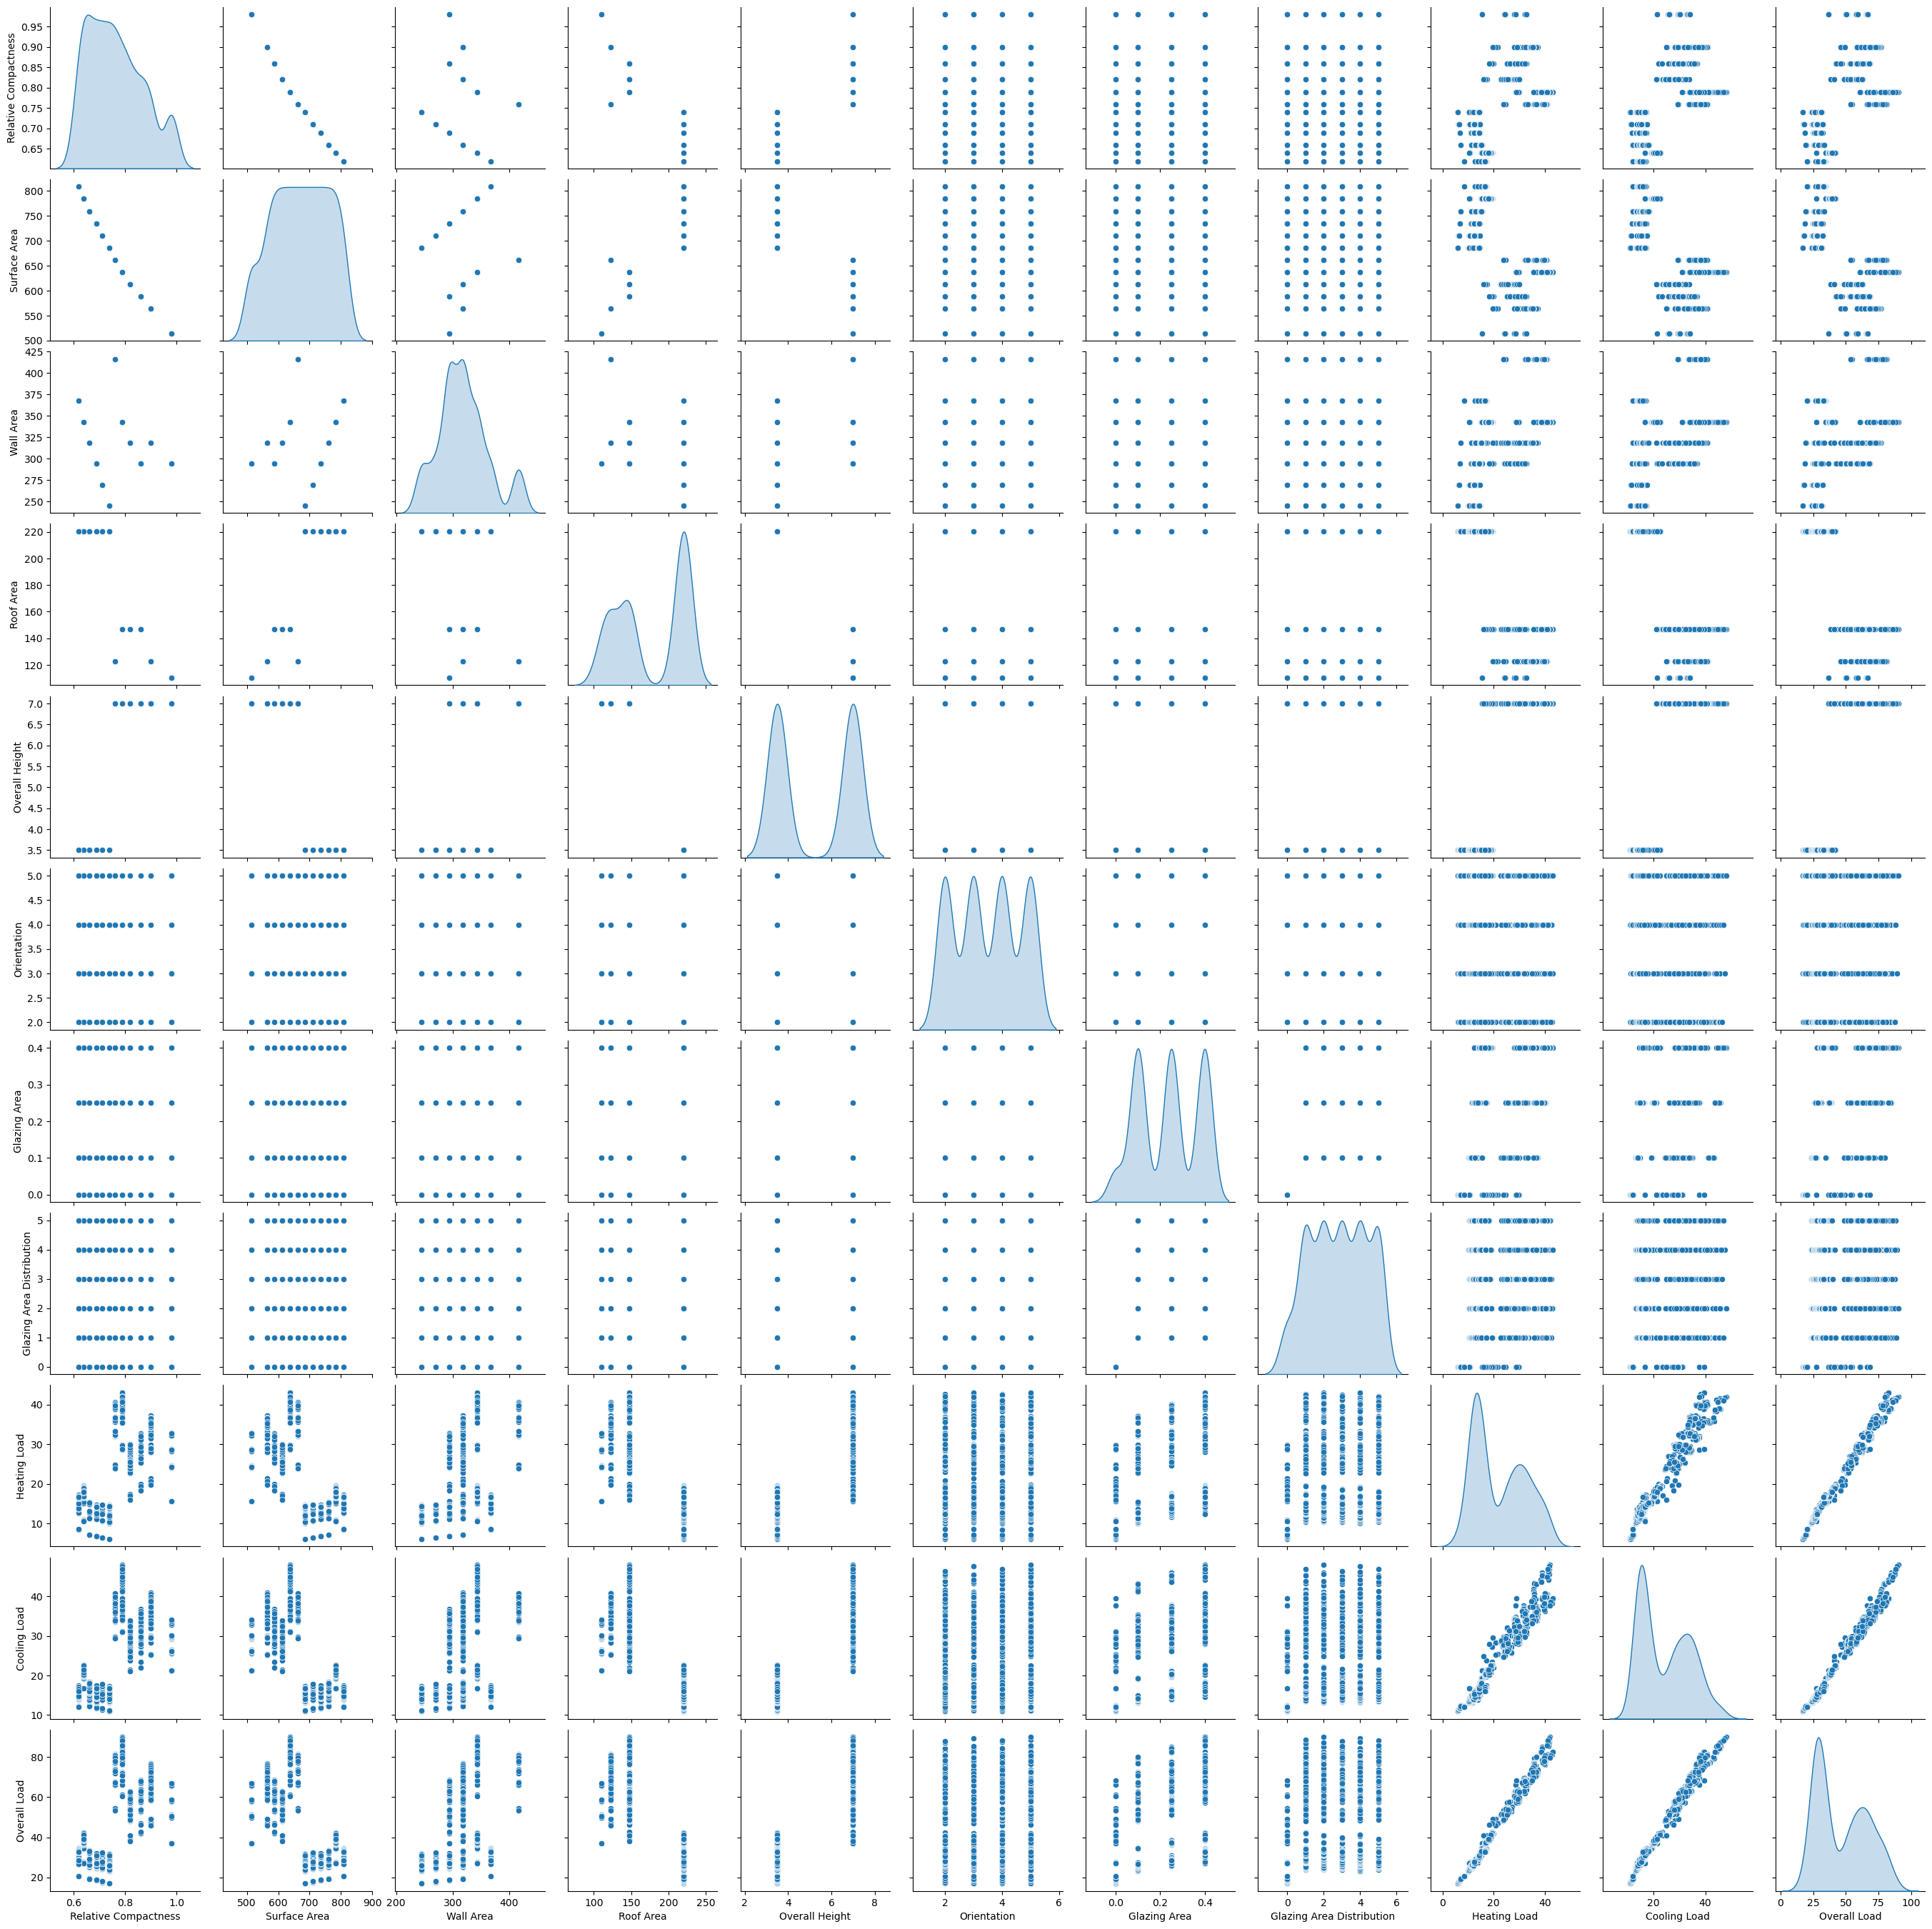

In [153]:
sns.pairplot(data, kind = "scatter", diag_kind = 'kde')
plt.show()

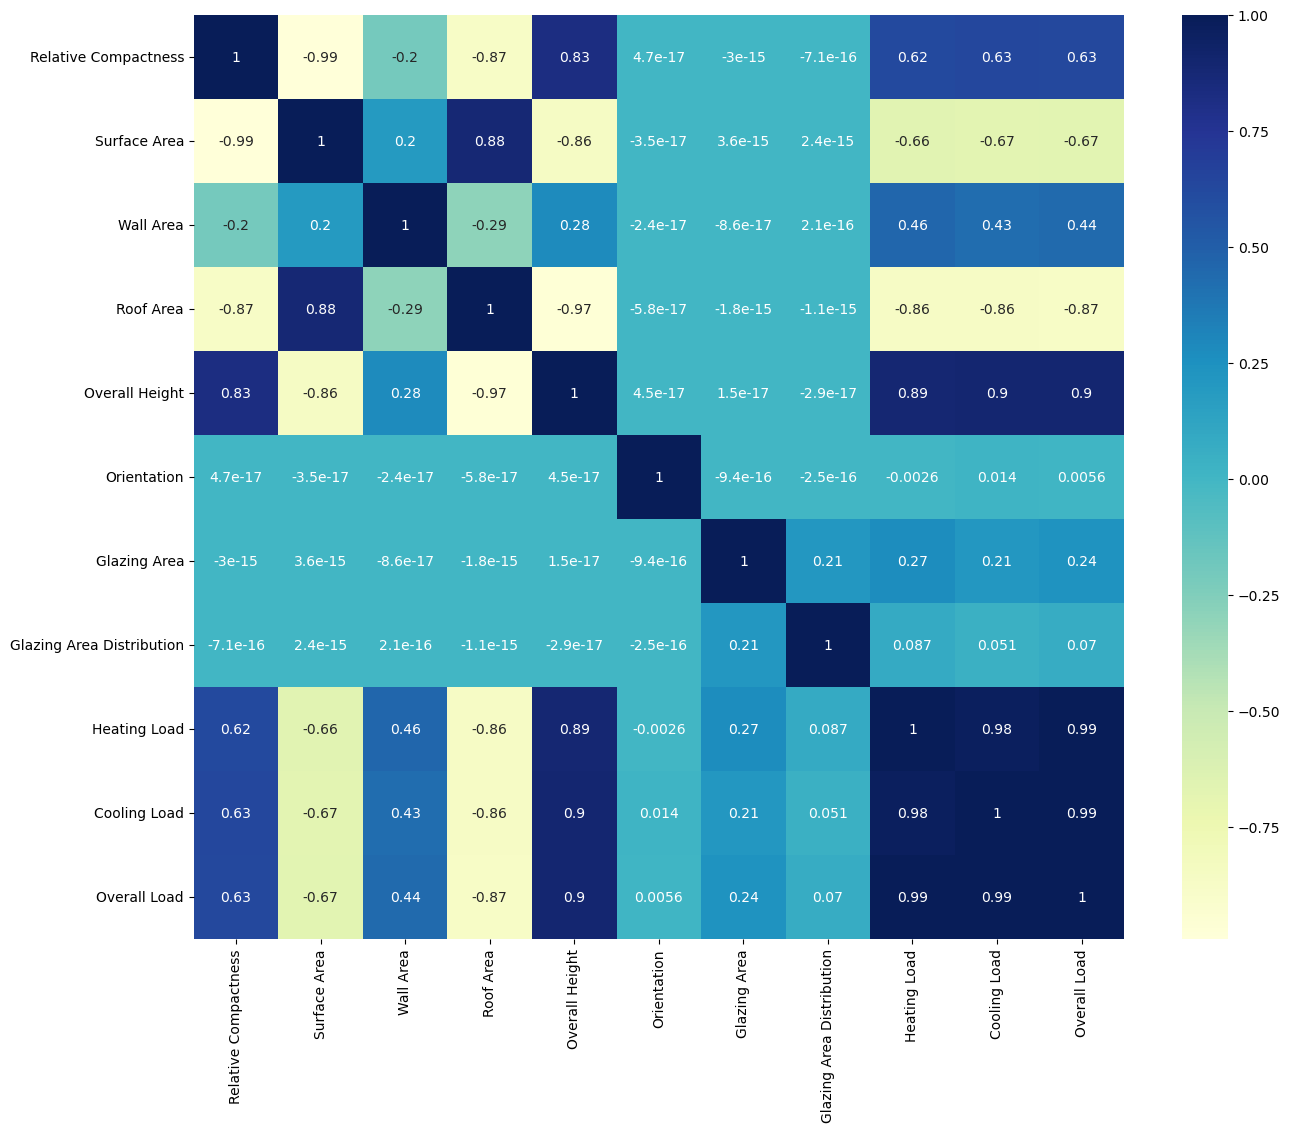

In [155]:
plt.subplots(figsize = (15, 12))
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = "YlGnBu")
plt.show()

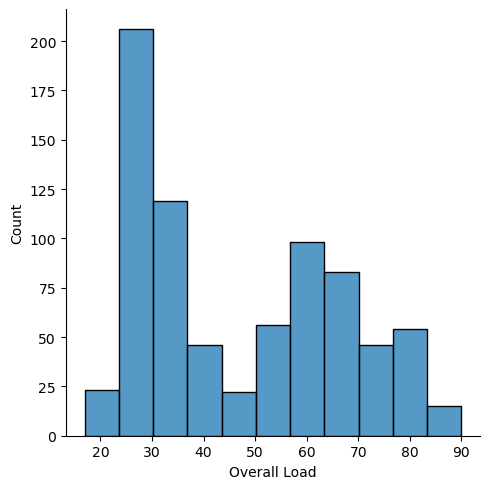

In [163]:
sns.displot(data['Overall Load'])
plt.show()

#### Creating a Column for "Efficiency"
Taking metrics as, 
If Overall Load < 29 => Low
   Overall Load < 64 => Average
   Overall Load > 64 => High

In [169]:
data['Efficiency'] = np.where(data['Overall Load']<29, 'Low', np.where(data['Overall Load']<64, 'Average', 'High'))
data

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   
765                  0.62         808.5      367.5     220.50             3.5   
766                  0.62         808.5      367.5     220.50             3.5   
767                  0.62         808.5      367.5     220.50             3.5   

     Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0              2           0.0                          0         15.55   
1              3           0.0                          0         15.55   
2              4           0.0                          0         15.55   
3              5           0.0                          0         15.55   
4              2           0.0                          0         20.84   
..           ...           ...                        ...           ...   
763            5           0.4                          5         17.88   
764            2           0.4                          5         16.54   
765            3           0.4                          5         16.44   
766            4           0.4                          5         16.48   
767            5           0.4                          5         16.64   

     Cooling Load  Overall Load Efficiency  
0           21.33         36.88    Average  
1           21.33         36.88    Average  
2           21.33         36.88    Average  
3           21.33         36.88    Average  
4           28.28         49.12    Average  
..            ...           ...        ...  
763         21.40         39.28    Average  
764         16.88         33.42    Average  
765         17.11         33.55    Average  
766         16.61         33.09    Average  
767         16.03         32.67    Average  

[768 rows x 12 columns]

In [179]:
data.shape

(768, 12)

In [181]:
data["Efficiency"].value_counts()

Efficiency
Average    368
Low        207
High       193
Name: count, dtype: int64

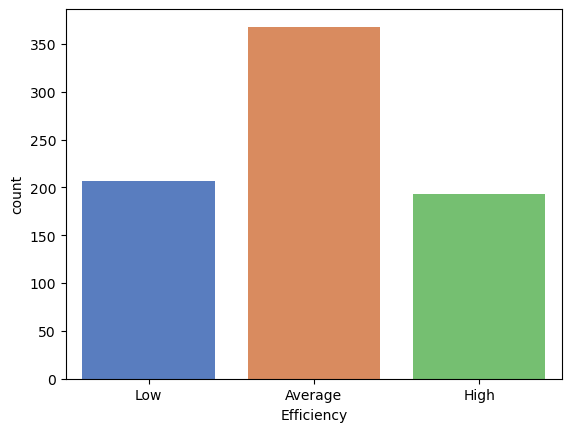

In [197]:
sns.countplot(x='Efficiency', data=data, order=['Low','Average','High'], palette = 'muted')
plt.show()

##### Creating dataset for Cooling Load by dropping [Heating Load, Overall Load, Efficiency]

In [201]:
data_cool = data.drop(columns = ['Heating Load', 'Overall Load', 'Efficiency'])
data_cool.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Cooling Load  
0            2           0.0                          0         21.33  
1            3           0.0                          0         21.33  
2            4           0.0                          0         21.33  
3            5           0.0                          0         21.33  
4            2           0.0                          0         28.28

In [203]:
data_cool.shape

(768, 9)

##### Creating dataset for Heating Load by dropping [Cooling Load, Overall Load, Efficiency]

In [206]:
data_heat = data.drop(columns = ['Cooling Load', 'Overall Load', 'Efficiency'])
data_heat.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  
0            2           0.0                          0         15.55  
1            3           0.0                          0         15.55  
2            4           0.0                          0         15.55  
3            5           0.0                          0         15.55  
4            2           0.0                          0         20.84

In [208]:
data_heat.shape

(768, 9)

##### Creating dataset for Efficiency by dropping [Cooling Load, Overall Load, Heating Load]

In [211]:
data_eff = data.drop(columns=['Cooling Load','Heating Load','Overall Load'])
data_eff.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution Efficiency  
0            2           0.0                          0    Average  
1            3           0.0                          0    Average  
2            4           0.0                          0    Average  
3            5           0.0                          0    Average  
4            2           0.0                          0    Average

In [213]:
data_eff.shape

(768, 9)

## Creating models for predicting heating load by creating models - 
#### Linear Regression, KNN Regressor, Ridge, Lasso,Polynomial, Ploynomial with Ridge, Linear SVR, SVM, Decicion Tree

In [227]:
X = data_heat.drop(columns = ['Heating Load'])
y = data_heat['Heating Load']

In [229]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [235]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [237]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 599.0150 - mse: 599.0150
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 572.8648 - mse: 572.8648
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 543.5885 - mse: 543.5885
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 510.5451 - mse: 510.5451
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 464.4360 - mse: 464.4360
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 366.2962 - mse: 366.2962
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.8049 - mse: 293.8049
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 217.2966 - mse: 217.2966
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.3296 - mse: 151.3296
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.6251 - mse: 99.6251  
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.8957 - mse: 75.8957
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.8739 - mse: 6

In [242]:
from sklearn.metrics import r2_score

y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Train r2: 0.91
Test r2: 0.90


#### Linear Regression

In [245]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)

print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.92
Accuracy of Linear Regression on test set: 0.91


#### KNN Regressor

In [249]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : [2,4,6,8,10,12]}
knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'n_neighbors': 8}

In [251]:
knn = KNeighborsRegressor(n_neighbors = 8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.94
Accuracy of Knn Regressor on test set: 0.92


#### Ridge

In [258]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
param_grid = {'alpha' : [0.01, 1, 5, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'alpha': 0.01}

In [260]:
ridge = Ridge(alpha = 0.01).fit(X_train, y_train)

ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.92
Accuracy of Ridge Regressor on test set: 0.91


#### Lasso

In [265]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.01}

In [267]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.91
Accuracy of Lasso Regressor on test set: 0.91


In [269]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.137
	Relative Compactness, -8.868
	Glazing Area, 7.841
	Roof Area, -5.615
	Wall Area, 3.758
	Glazing Area Distribution, 1.114
	Orientation, -0.047


#### Polynomial Regression

In [272]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [274]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.995164727474077
(poly deg 2) R-squared score (test): 0.9940893970426871



#### Polynomial with Ridge

In [278]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9367331731420387
(poly deg 2 + ridge) R-squared score (test): 0.936254652492342


#### Linear SVR

In [281]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10}

In [283]:
lsvr=LinearSVR(C=10).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.91
Accuracy of Linear SVR classifier on test set: 0.91


#### SVM Regressor

In [286]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [292]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of SVM Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of SVM Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of SVM Regressor on training set: 0.97
Accuracy of SVM Regressor on test set: 0.97


#### Decision Tree

In [295]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 8}

In [297]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9992710026423552
Accuracy of Dt Regressor on test set: 0.9965385654486217


### Summary of R- Square Scores for Base Regression Models for Heating Load
#### 1. Linear Regression : 0.91
#### 2. KNN Regressor : 0.92
#### 3.Ridge: 0.91
#### 4.Lasso : 0.91
#### 5.Polynomial : 0.994
#### 6.Polynomial with Ridge: 0.9362
#### 7.Linear SVR : 0.91
#### 8.SVM : 0.97
#### 9.Decision Tree : 0.9965
### Best Base Regression Model :- Decision Tree with R Square= 0.9965

### Creating models for predicting cooling load by creating models -
#### Linear Regression, KNN Regressor, Ridge, Lasso,Polynomial, Ploynomial with Ridge, Linear SVR, SVM, Decicion Tree

In [304]:
X = data_cool.drop(columns = ['Cooling Load'])
y = data_cool['Cooling Load']

In [306]:
y.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling Load, dtype: float64

In [308]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [310]:
nn_reg = Sequential()
nn_reg.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_reg.add(Dense(1, activation='linear'))

nn_reg.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

nn_reg.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 699.3140 - mse: 699.3140
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 663.3138 - mse: 663.3138
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 627.4924 - mse: 627.4924
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 597.5280 - mse: 597.5280
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 574.5113 - mse: 574.5113
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 527.1629 - mse: 527.1629
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 419.0184 - mse: 419.0184
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 341.3410 - mse: 341.3410
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274.7099 - mse: 274.7099
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.8405 - mse: 181.8405
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.8352 - mse: 121.8352
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.3631 - mse:

In [312]:
y_train_predict = nn_reg.predict(X_train)
y_test_predict = nn_reg.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train r2: 0.87
Test r2: 0.88


#### Linear Regression

In [315]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_predict = lr.predict(X_train)
print('Accuracy of Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Linear Regression on training set: 0.89
Accuracy of Linear Regression on test set: 0.89


#### KNN Regressor

In [318]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [320]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train, y_train)
print('Accuracy of Knn Regressor on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Knn Regressor on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Knn Regressor on training set: 0.92
Accuracy of Knn Regressor on test set: 0.91


#### Ridge

In [323]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [325]:
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('Accuracy of Ridge Regressor on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of Ridge Regressor on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of Ridge Regressor on training set: 0.89
Accuracy of Ridge Regressor on test set: 0.89


#### Lasso

In [328]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000).fit(X_train,y_train)
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [330]:
lasso = Lasso(max_iter = 10000, alpha=0.01).fit(X_train,y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Accuracy of Lasso Regressor on training set: {:.2f}'
     .format(lasso.score(X_train, y_train)))
print('Accuracy of Lasso Regressor on test set: {:.2f}'
     .format(lasso.score(X_test, y_test)))

Number of features used: 7
Accuracy of Lasso Regressor on training set: 0.88
Accuracy of Lasso Regressor on test set: 0.89


In [332]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	Overall Height, 17.072
	Relative Compactness, -12.405
	Roof Area, -7.361
	Glazing Area, 5.643
	Glazing Area Distribution, 0.237
	Orientation, 0.114
	Wall Area, 0.017


#### Polynomial Regression

In [335]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print("X Train Polynomial Shape: - {}".format(X_train_poly.shape))
print("X Test Polynomial Shape: - {}".format(X_test_poly.shape))

X Train Polynomial Shape: - (576, 45)
X Test Polynomial Shape: - (192, 45)


In [337]:
lr = LinearRegression().fit(X_train_poly, y_train)
predict_lr= lr.predict(X_test_poly)
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) R-squared score (training): 0.9727153098421761
(poly deg 2) R-squared score (test): 0.9699945853277924



#### Polynomial with Ridge

In [340]:
ridge = Ridge().fit(X_train_poly, y_train)
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9031799095919619
(poly deg 2 + ridge) R-squared score (test): 0.909897496119743


#### Linear SVR

In [343]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C': [0.01,0.1,1,10,100]}
lsvr=LinearSVR()
grid_search = GridSearchCV(lsvr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100}

In [345]:
lsvr=LinearSVR(C=100).fit(X_train, y_train)
print('Accuracy of Linear SVR classifier on training set: {:.2f}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {:.2f}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.88
Accuracy of Linear SVR classifier on test set: 0.88


#### SVM Regressor

In [348]:
from sklearn.svm import SVR
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [352]:
svr = SVR(C=100, epsilon=1).fit(X_train, y_train)
print('Accuracy of SVM Regressor on training set: {:.2f}'
     .format(svr.score(X_train, y_train)))
print('Accuracy of SVM Regressor on test set: {:.2f}'
     .format(svr.score(X_test, y_test)))

Accuracy of SVM Regressor on training set: 0.96
Accuracy of SVM Regressor on test set: 0.94


#### Decision Tree

In [355]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=10)
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 6}

In [357]:
dt = DecisionTreeRegressor(max_depth=6, random_state=10).fit(X_train, y_train)
print('Accuracy of DT Regressor on training set: {}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Dt Regressor on test set: {}'
     .format(dt.score(X_test, y_test)))

Accuracy of DT Regressor on training set: 0.9753913875987169
Accuracy of Dt Regressor on test set: 0.9650350273065316


### Summary of R- Square Scores for Base Regression Models for Cooling Load
#### 1. Linear Regression : 0.89
#### 2. KNN Regressor : 0.91
#### 3. Ridge: 0.89
#### 4. Lasso : 0.89
#### 5. Polynomial : 0.9699
#### 6. Polynomial with Ridge: 0.90
#### 7. Linear SVR : 0.88
#### 8. SVM : 0.94
#### 9. Decision Tree : 0.9650
### Best Base Regression Model for Cooling Load : Decision Tree with R Square = 0.9650

#### Models for the Classification of Energy

In [397]:
X = data_eff.drop(columns= ['Efficiency'])
y = data_eff['Efficiency']

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [399]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### Neural Network Classifier

In [402]:
y_dummy = pd.get_dummies(y)
y_dummy.head()

0      1      2
0  True  False  False
1  True  False  False
2  True  False  False
3  True  False  False
4  True  False  False

In [404]:
X_train_org, X_test_org, y_train_dummy, y_test_dummy = train_test_split(X, y_dummy, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [408]:
nn_clf = Sequential()
nn_clf.add(Dense(5, input_dim=8, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(5, kernel_initializer='uniform', activation='relu'))
nn_clf.add(Dense(3, activation='sigmoid'))

nn_clf.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='rmsprop')

nn_clf.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4759 - loss: 1.0893
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5236 - loss: 1.0579
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4793 - loss: 1.0517
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4517 - loss: 1.0388
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4893 - loss: 0.9915
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4526 - loss: 0.9680
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4952 - loss: 0.9070
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4552 - loss: 0.8719
Epoch 9/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5389 - loss: 0.8095
Epoch 10/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5476 - loss: 0.7772
Epoch 11/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5239 - loss: 0.7515
Epoch 12/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [412]:
y_pred = nn_clf.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 2,
       0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [414]:
from sklearn.metrics import accuracy_score
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))

Test accuracy score: 0.8874458874458875


In [416]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix for efficiency: \n')
print(confusion_matrix(y_true=y_test, y_pred=y_pred), '\n')

Confusion matrix for efficiency: 

[[101   6   6]
 [ 10  51   0]
 [  4   0  53]] 



In [418]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       113
           1       0.89      0.84      0.86        61
           2       0.90      0.93      0.91        57

    accuracy                           0.89       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.89      0.89      0.89       231



In [420]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=100)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5435 - loss: 1.0653
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5951 - loss: 0.9043
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7115 - loss: 0.7939
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.7014
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7810 - loss: 0.6495
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.6075
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8365 - loss: 0.5532
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.5390
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8611 - loss: 0.4928
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8482 - loss: 0.4797
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8473 - loss: 0.4722
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [422]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Test accuracy score: 0.9264069264069265
Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       113
           1       0.97      0.97      0.97        61
           2       0.84      0.95      0.89        57

    accuracy                           0.93       231
   macro avg       0.92      0.94      0.93       231
weighted avg       0.93      0.93      0.93       231



In [424]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, y_train_dummy, batch_size=10, epochs=150)

Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3303 - loss: 1.0584
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5450 - loss: 0.9607
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6260 - loss: 0.8851
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6670 - loss: 0.8355
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6567 - loss: 0.7951
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6375 - loss: 0.7469
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6784 - loss: 0.6987
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7579 - loss: 0.6382
Epoch 9/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7794 - loss: 0.6102
Epoch 10/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8103 - loss: 0.5755
Epoch 11/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.5353
Epoch 12/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

In [426]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred
print('Test accuracy score: {}'.format(accuracy_score(y_true=y_test, y_pred=y_pred)))
print('Classification Report for efficiency: \n')
print(classification_report(y_true=y_test, y_pred=y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test accuracy score: 0.9437229437229437
Classification Report for efficiency: 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       113
           1       0.98      0.97      0.98        61
           2       0.90      0.93      0.91        57

    accuracy                           0.94       231
   macro avg       0.94      0.95      0.94       231
weighted avg       0.94      0.94      0.94       231



### Accuracy of the Deep Learning Model for Efficiency Classification: 94%